# Geoplot

关于geoplot，主要参考了：[geoplot: geospatial data visualization](https://residentmario.github.io/geoplot/index.html).

geoplot是一个高层的地理空间可视化库，它扩展了cartopy和matplotlib，使绘图更加方便，它和cartopy的关系类似于seaborn之于matplotlib，能起到一种补充的作用。使用它基本上要配合geopandas，因为空间数据可视化，必然要从空间数据分析开始，而geopandas就是空间数据分析中最常用的库，因此首先安装geopandas（关于geopandas的内容可以参考：[OuyangWenyu/hydroGIS/AutoGIS/lesson2.ipynb](https://github.com/OuyangWenyu/hydroGIS/blob/master/AutoGIS/lesson2.ipynb)，这里重点介绍可视化），然后再安装它：

```Shell
conda install -c conda-forge geopandas geoplot
```

接下来直接看例子快速了解下geoplot。

## Quick start

geopandas的geodataframe就是pandas的dataframe加上geometry属性列。

In [1]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd; pd.set_option('max_columns', 6)

In [2]:
import geopandas as gpd

In [3]:
import geoplot as gplt
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


注意数据的坐标：

In [4]:
usa_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

更多关于空间数据的内容，可以参考：[Working with Geospatial Data](https://residentmario.github.io/geoplot/user_guide/Working_with_Geospatial_Data.html)。

如果数据包含很多点需要展示，那么可以使用pointplot

<AxesSubplot:>

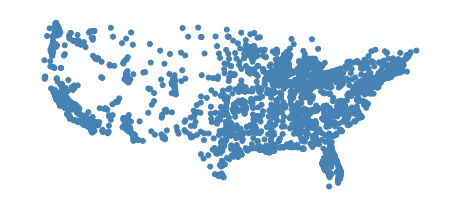

In [5]:
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

如果是多边形数据，那就是用polyplot：

<AxesSubplot:>

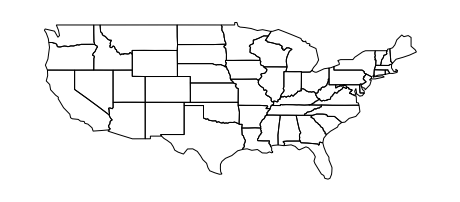

In [6]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(contiguous_usa)

In [7]:
contiguous_usa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

可以使用overplotting轻松地将上面的图形绘制到一起，这是geoplot中多图层叠加的方式。

<AxesSubplot:>

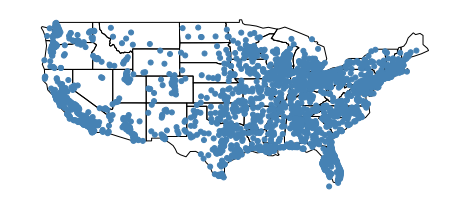

In [8]:
ax = gplt.polyplot(contiguous_usa)
gplt.pointplot(continental_usa_cities, ax=ax)

可以使用不同的投影来绘制地图。

In [9]:
continental_usa_cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<GeoAxesSubplot:>

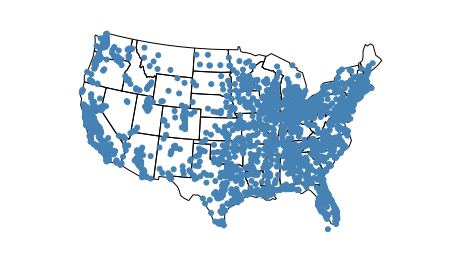

In [10]:
import geoplot.crs as gcrs

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(continental_usa_cities, ax=ax)

注意点的投影并没有手动改变，所以这里geoplot直接把坐标转换了。

geoplot中可以使用webmap（因为需要下载，会有些慢）：

<GeoAxesSubplot:>

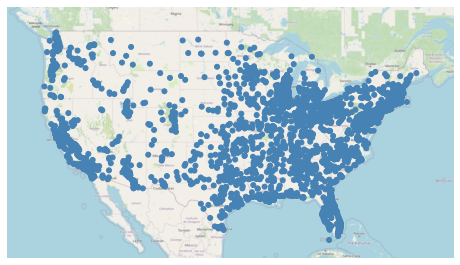

In [11]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax)

以上是一个静态的web地图，也可以做交互式的图。这个地图展示了全美的城市分布，可以看到沿海比内陆落基山脉附近的城市要多，但是还没有反映城市本身的信息。可以增加一个hue上去：

<GeoAxesSubplot:>

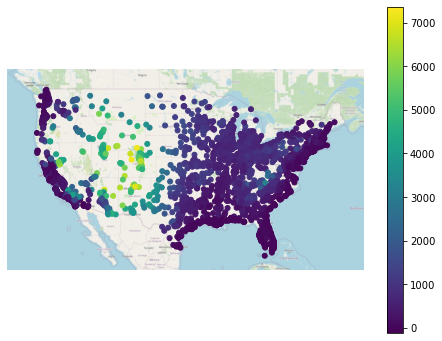

In [12]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', legend=True)

现在的地图就告诉我们了一个story，美国中部的城市有更高的ELEV_IN_FT。可以使用不同的颜色：

<GeoAxesSubplot:>

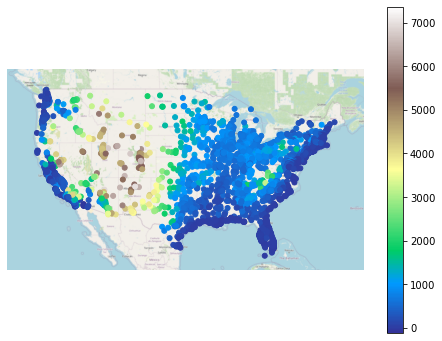

In [13]:
ax = gplt.webmap(contiguous_usa, projection=gcrs.WebMercator())
gplt.pointplot(continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='terrain', legend=True)

geoplot中也有很多选项可以用来调整图形的样式，比如：

Text(0.5, 1.0, 'Cities in the Continental United States by Elevation')

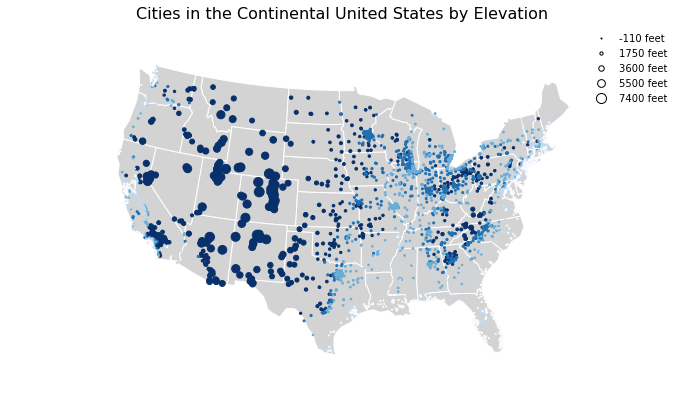

In [14]:
ax = gplt.polyplot(
    contiguous_usa, projection=gcrs.AlbersEqualArea(),
    edgecolor='white', facecolor='lightgray',
    figsize=(12, 8)
)
gplt.pointplot(
    continental_usa_cities, ax=ax, hue='ELEV_IN_FT', cmap='Blues',
    scheme='quantiles',
    scale='ELEV_IN_FT', limits=(1, 10),
    legend=True, legend_var='scale',
    legend_kwargs={'frameon': False},
    legend_values=[-110, 1750, 3600, 5500, 7400],
    legend_labels=['-110 feet', '1750 feet', '3600 feet', '5500 feet', '7400 feet']
)
ax.set_title('Cities in the Continental United States by Elevation', fontsize=16)

这里稍微补充下图形定制的基本知识，主要参考：[Customizing Plots](https://residentmario.github.io/geoplot/user_guide/Customizing_Plots.html#scale).

有几个参数是有必要了解下的：

- hue
- scale
- legend
- Extent

接下来一一解释。

geoplot 的 hue参数增加颜色变量，没有用color关键字是因为matplotlib中已经有用了。比如上例中的hue='ELEV_IN_FT'，就是告诉geoplot要基于ELEV_IN_FT值给各个point上色。

有两种方式给图上色，其一是连续的颜色图，另一个是分类的离散颜色图。默认geoplot用连续颜色，要转换成分类色图需要使用scheme参数。scheme参数的值需要借助 mapclassify.Quantiles 函数来帮助实现，实现方式很简单，用到可以查看官方文档。

geoplot默认使用的颜色图是viridis ，如果要指定颜色，需要使用cmap参数。更多cmap参数值可以参考文档。


使用scale参数可以直接在图上反映特征的值大小，和它配套的是limits参数，用来制定显示在图上的点显示的几何大小的范围。


legend就是图例了。legend的类型取决于配置的选项，有三种不同的类型，如果是分类的图，那么legend就是一个分类的，如果连续的颜色图，legend就是一个条状。legend的位置等微调可以使用legend_kwargs 参数来实现。这部分和matplotlib的是一致的。

Extent是轴显示的范围，默认的是(min_longitude, min_latitude, max_longitude, max_latitude)。extent值可以通过手动指定来调整，比如：

```python
extent = contiguous_usa.query('state == "California"').total_bounds
```

现在看看别的图形类型：

<GeoAxesSubplot:>

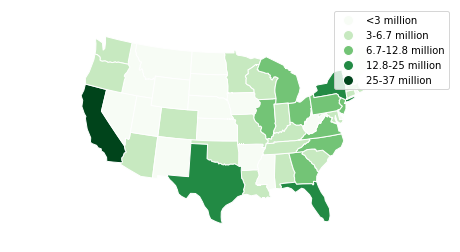

In [15]:
gplt.choropleth(
    contiguous_usa, hue='population', projection=gcrs.AlbersEqualArea(),
    edgecolor='white', linewidth=1,
    cmap='Greens', legend=True,
    scheme='FisherJenks',
    legend_labels=[
        '<3 million', '3-6.7 million', '6.7-12.8 million',
        '12.8-25 million', '25-37 million'
    ]
)

C:\Users\hust2\miniconda3\envs\hydrus\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hust2\miniconda3\envs\hydrus\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

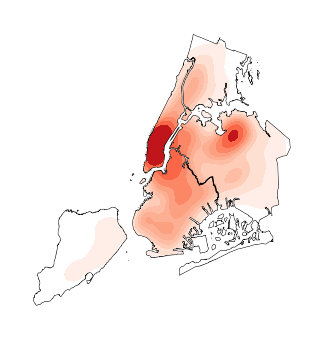

In [16]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.kdeplot(collisions, cmap='Reds', shade=True, clip=boroughs, projection=gcrs.AlbersEqualArea())
gplt.polyplot(boroughs, zorder=1, ax=ax)

## 日常积累

这里记录根据日常所需，参考[官方gallery](https://residentmario.github.io/geoplot/gallery/index.html)的一些实例。

### 绘点于地图上

美国城市高程，不同的归一化函数用来设置不同的点的显示大小，包括线性归一化，统一大小，log归一化等不同方式：

In [17]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
# 排除在阿拉斯加，夏威夷和波多黎各的地方，只用CONUS的
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
continental_usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [18]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


Text(0.5, 1.0, 'Linear Scale')

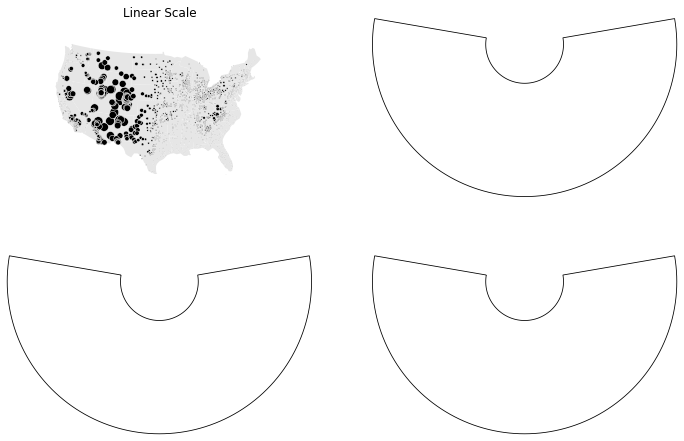

In [19]:
# 选择投影
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
# 绘制多个子图
f, axarr = plt.subplots(2, 2, figsize=(12, 8), subplot_kw={'projection': proj})
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9), 'linewidth': 0}
pointplot_kwargs = {
    'scale': 'ELEV_IN_FT', 'edgecolor': 'white', 'linewidth': 0.5, 'color': 'black'
}
gplt.polyplot(contiguous_usa.geometry, ax=axarr[0][0], **polyplot_kwargs)
gplt.pointplot(
    continental_usa_cities.query("POP_2010 > 10000"),
    ax=axarr[0][0], limits=(0.1, 10), **pointplot_kwargs
)
axarr[0][0].set_title("Linear Scale")

In [20]:
def identity_scale(minval, maxval):
    def scalar(val):
        return 2
    return scalar

gplt.polyplot(contiguous_usa.geometry, ax=axarr[0][1], **polyplot_kwargs)
gplt.pointplot(
    continental_usa_cities.query("POP_2010 > 10000"),
    ax=axarr[0][1], scale_func=identity_scale, **pointplot_kwargs
)
axarr[0][1].set_title("Identity Scale")


def log_scale(minval, maxval):
    def scalar(val):
        val = val + abs(minval) + 1
        return np.log10(val)
    return scalar

gplt.polyplot(
    contiguous_usa.geometry,
    ax=axarr[1][0], **polyplot_kwargs
)
gplt.pointplot(
    continental_usa_cities.query("POP_2010 > 10000"),
    ax=axarr[1][0], scale_func=log_scale, **pointplot_kwargs
)
axarr[1][0].set_title("Log Scale")


def power_scale(minval, maxval):
    def scalar(val):
        val = val + abs(minval) + 1
        return (val/1000)**2
    return scalar

gplt.polyplot(
    contiguous_usa.geometry,
    ax=axarr[1][1], **polyplot_kwargs
)
gplt.pointplot(
    continental_usa_cities.query("POP_2010 > 10000"),
    ax=axarr[1][1], scale_func=power_scale, **pointplot_kwargs
)
axarr[1][1].set_title("Power Scale")

plt.suptitle('Continental US Cities by Elevation, 2016', fontsize=16)

plt.subplots_adjust(top=0.95)
plt.savefig("usa-city-elevations.png", bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

分到两个cell里面，第二个cell画不出来，所以如果想要看到全部4个图，还需要都放到一个cell里面。下面看看只画一个图：

Text(0.5, 1.0, 'LinearScale')

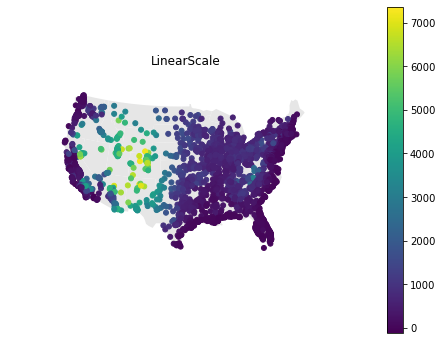

In [21]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import numpy as np
import matplotlib.pyplot as plt

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
proj = gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5)
polyplot_kwargs = {'facecolor': (0.9, 0.9, 0.9), 'linewidth': 0}
# 尝试不同的参数值
# pointplot_kwargs = {'scale': 'ELEV_IN_FT', 'edgecolor': 'white', 'linewidth': 0.5, 'color': 'black', 'legend':True}
pointplot_kwargs = {'hue': 'ELEV_IN_FT', 'legend':True}
ax=gplt.polyplot(contiguous_usa.geometry,projection=proj, **polyplot_kwargs)
gplt.pointplot(
    continental_usa_cities.query("POP_2010 > 10000"),
    ax=ax, limits=(0.1, 10), **pointplot_kwargs
)
ax.set_title("Linear"+"Scale")

### 点绘分类

先看一个官方的实例：

In [22]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import mapclassify as mc

continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
continental_usa_cities.head()

,id,POP_2010,ELEV_IN_FT,STATE,geometry
0,53,40888.0,1611.0,ND,POINT (-101.29627 48.23251)
1,101,52838.0,830.0,ND,POINT (-97.03285 47.92526)
2,153,15427.0,1407.0,ND,POINT (-98.70844 46.91054)
3,177,105549.0,902.0,ND,POINT (-96.78980 46.87719)
4,192,17787.0,2411.0,ND,POINT (-102.78962 46.87918)


In [23]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [24]:
# mapclassify 的 Quantiles 函数可以用来分类，后面绘图的时候就可以对不同类配置不同颜色
scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)
scheme

Quantiles                       

        Interval           Count
--------------------------------
[  10008.00,   13227.00] |   724
(  13227.00,   18383.00] |   723
(  18383.00,   27537.00] |   723
(  27537.00,   51878.00] |   723
(  51878.00, 8175133.00] |   723

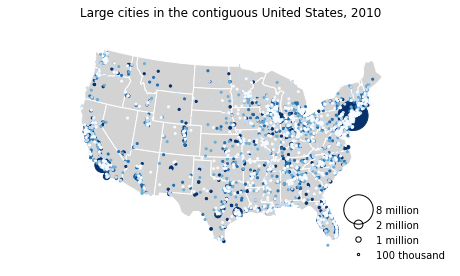

In [25]:
# 以地图为坐标轴
ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(8, 12)
)
# 在地图上绘点
gplt.pointplot(
    continental_usa_cities,
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)

# 配题目等
plt.title("Large cities in the contiguous United States, 2010")
plt.savefig("largest-cities-usa.png", bbox_inches='tight', pad_inches=0.1)

现在根据官方的实例，修改成自己想要的。